# Electric Vehicals Data Set

## Problem Statement :
 ### At what geographical locations are EVs most popular?
 ### Potential Charging Points on the maps?
 ### What models and makes are most popular among poeple?

## Summary
### Based on the above exploration of data ,we can conclude that Tesla is the most famous brand among poeple and its models also has the highest EV range. Also, based on the data related to counties , we can estimate where to put EV points, however the data lacks existing EV points location. This data could be handy if we want to plan future EV points.
### Also the use of EV cars has significantly increased in the recent years, this data could be useful who just wants to step in the business. Whereas TESLA could be a benchmark to compete with

We have a electric vehicals dataset, we will be first explore the data set and then visualize it using matplotlib and plotly.
First, we will import necessary libraries and read the csv file containing our data set using read_csv method from pandas

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


### Inspecting the dataset

In [32]:

df.shape

(166800, 17)

In [33]:
print(f'Our data set has {df.shape[0]} rows and {df.shape[1]} columns')

Our data set has 166800 rows and 17 columns


Lets check for null values

In [35]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

# cleaning the dataset

In [36]:
df.dropna(inplace=True)
df.shape


(166435, 17)

In [37]:
print (f'we have dropped {166880-df.shape[0]} rows and {18-df.shape[1]} columns')

we have dropped 445 rows and 1 columns


In [38]:
#lets check again to see if there are any null values left
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [39]:
#lets check statistics of the data
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,166435.000000,166435.000000,166435.000000,166435.000000,166435.000000,1.664350e+05,1.664350e+05
mean,98261.118659,2020.343564,61.496861,1149.906510,29.179247,2.172652e+08,5.303982e+10
std,304.149327,3.001137,93.270217,8648.905282,14.853652,7.727789e+07,1.623324e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.790872e+08,5.303301e+10
50%,98122.000000,2021.000000,0.000000,0.000000,33.000000,2.244239e+08,5.303303e+10
75%,98371.000000,2023.000000,84.000000,0.000000,42.000000,2.513457e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


# more exploratory data analysis

In [40]:
#checking the count of vehicals based on brand name
df.value_counts('Make')

Make
TESLA                   74661
NISSAN                  13835
CHEVROLET               13046
FORD                     8557
BMW                      7181
KIA                      6984
TOYOTA                   5780
VOLKSWAGEN               4706
JEEP                     4090
HYUNDAI                  4049
VOLVO                    3954
RIVIAN                   3550
AUDI                     3456
CHRYSLER                 2865
MERCEDES-BENZ            1341
PORSCHE                  1096
MITSUBISHI                940
MINI                      854
POLESTAR                  852
HONDA                     819
FIAT                      801
SUBARU                    787
MAZDA                     384
LEXUS                     307
SMART                     275
LINCOLN                   253
CADILLAC                  243
LUCID                     231
JAGUAR                    221
GENESIS                   160
LAND ROVER                 52
ALFA ROMEO                 29
DODGE                      28
FISKE

# Visualizing the dataset

In [27]:
df.groupby('Make').count()['Model'].sort_values(ascending=False)

Make
TESLA                   74661
NISSAN                  13835
CHEVROLET               13046
FORD                     8557
BMW                      7181
KIA                      6984
TOYOTA                   5780
VOLKSWAGEN               4706
JEEP                     4090
HYUNDAI                  4049
VOLVO                    3954
RIVIAN                   3550
AUDI                     3456
CHRYSLER                 2865
MERCEDES-BENZ            1341
PORSCHE                  1096
MITSUBISHI                940
MINI                      854
POLESTAR                  852
HONDA                     819
FIAT                      801
SUBARU                    787
MAZDA                     384
LEXUS                     307
SMART                     275
LINCOLN                   253
CADILLAC                  243
LUCID                     231
JAGUAR                    221
GENESIS                   160
LAND ROVER                 52
ALFA ROMEO                 29
DODGE                      28
FISKE

### The below plot shows tesla is the most popular choice among poeple 

<Axes: xlabel='Make', ylabel='Count'>

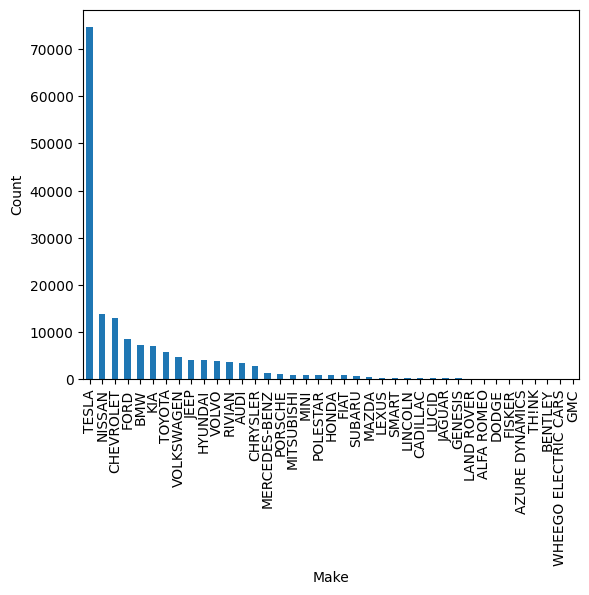

In [44]:
df.groupby('Make').count()['Model'].sort_values(ascending=False).plot(kind='bar',xlabel='Make',ylabel='Count')

### The below plot shows how many unique models each company has

<Axes: xlabel='Make'>

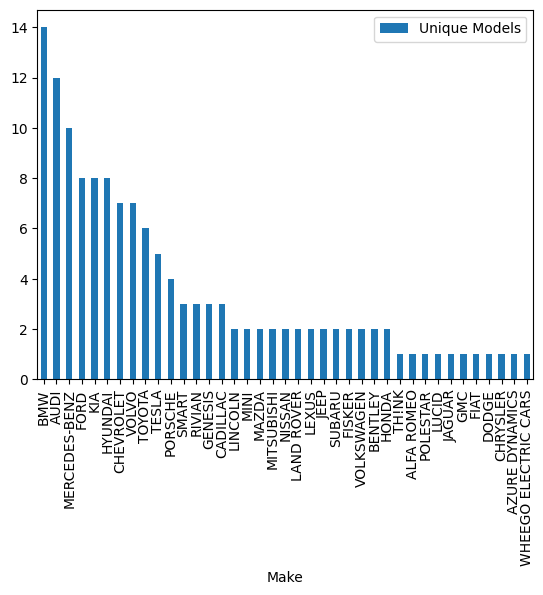

In [112]:

df.groupby('Make')['Model'].nunique().reset_index(name='Unique Models').sort_values('Unique Models', ascending=False).plot(kind='bar',x='Make',y='Unique Models')



### The plot below shows that there has been a significant increase in the usage of electric vehicles in the recent years

<Axes: xlabel='Model Year', ylabel='Count'>

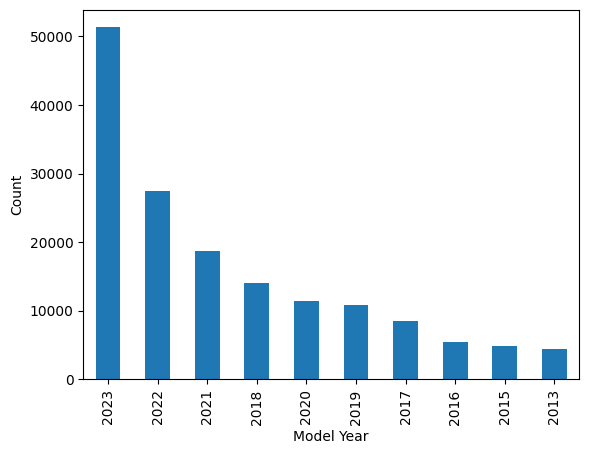

In [111]:
df.groupby('Model Year')['Model'].count().sort_values(ascending=False).head(10).plot(kind='bar',xlabel='Model Year',ylabel='Count')

### Tesla models has the highest electric range

<Axes: xlabel='Make', ylabel='Max Electric Range'>

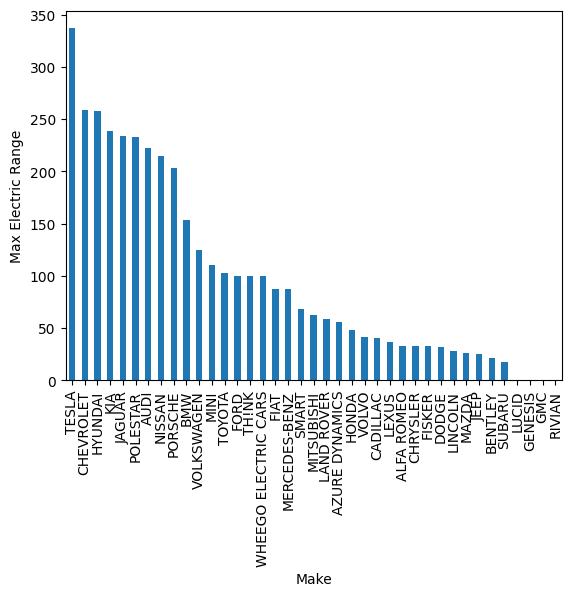

In [137]:
df.groupby('Make')['Electric Range'].max().sort_values(ascending=False).plot(kind='bar',xlabel='Make',ylabel='Max Electric Range')

In [180]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [188]:



df.groupby(['County', 'Make', 'Model']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).drop_duplicates(subset='County')





,County,Make,Model,Count
1023,King,TESLA,MODEL Y,18633
1994,Snohomish,TESLA,MODEL Y,5078
1647,Pierce,TESLA,MODEL 3,2275
383,Clark,TESLA,MODEL Y,1656
2256,Thurston,TESLA,MODEL Y,788
1131,Kitsap,TESLA,MODEL 3,746
2102,Spokane,TESLA,MODEL Y,732
2432,Whatcom,NISSAN,LEAF,616
120,Benton,TESLA,MODEL 3,375
1827,Skagit,TESLA,MODEL Y,265


#### Base on th above data, Tesla seems to dominate the top counties having the most electric cars.

In [206]:
count_by_location = df.groupby(['County', 'City', 'State','Vehicle Location']).size().reset_index(name='Vehicle Count').sort_values(by='Vehicle Count', ascending=False)
print(count_by_location)


        County      City State               Vehicle Location  Vehicle Count
240       King   Redmond    WA    POINT (-122.12302 47.67668)           4245
208       King  Kirkland    WA     POINT (-122.20264 47.6785)           2780
159       King  Bellevue    WA   POINT (-122.16937 47.571015)           2650
272       King   Seattle    WA     POINT (-122.3185 47.67949)           2553
585  Snohomish   Bothell    WA    POINT (-122.1873 47.820245)           2464
..         ...       ...   ...                            ...            ...
382      Lewis    Curtis    WA    POINT (-122.96692 46.66113)              1
379      Lewis  Chehalis    WA  POINT (-122.962555 46.716875)              1
378      Lewis  Chehalis    WA  POINT (-122.71614 46.5308781)              1
375      Lewis      Adna    WA      POINT (-123.0615 46.6326)              1
793     Yakima    Zillah    WA   POINT (-120.421245 46.44554)              1

[794 rows x 5 columns]


In [195]:
popular_make_model = df.groupby(['Make', 'Model']).size().reset_index(name='Vehicle Count').sort_values(by='Vehicle Count', ascending=False)
print(popular_make_model.head())

          Make    Model  Vehicle Count
119      TESLA  MODEL Y          32765
116      TESLA  MODEL 3          28847
102     NISSAN     LEAF          13261
117      TESLA  MODEL S           7588
35   CHEVROLET  BOLT EV           6405


In [196]:
ev_type_distribution = df['Electric Vehicle Type'].value_counts()
print(ev_type_distribution)

Electric Vehicle Type
Battery Electric Vehicle (BEV)            130053
Plug-in Hybrid Electric Vehicle (PHEV)     36382
Name: count, dtype: int64


In [197]:
cafv_eligibility_distribution = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(cafv_eligibility_distribution)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    83377
Clean Alternative Fuel Vehicle Eligible                         64142
Not eligible due to low battery range                           18916
Name: count, dtype: int64


In [198]:
electric_range_stats = df['Electric Range'].describe()
print(electric_range_stats)

count    166435.000000
mean         61.496861
std          93.270217
min           0.000000
25%           0.000000
50%           0.000000
75%          84.000000
max         337.000000
Name: Electric Range, dtype: float64
